In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [181]:
df=pd.read_csv('test.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0  19556  Female     Loyal Customer   52  Business travel       Eco   
1  90035  Female     Loyal Customer   36  Business travel  Business   
2  12360    Male  disloyal Customer   20  Business travel       Eco   
3  77959    Male     Loyal Customer   44  Business travel  Business   
4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 5   
1                       3  ...                       4                 4   
2                       2  ...                       2                 4   
3                       0  ...                       1                 1   
4                       4  ...                       2                 2   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 5                 5                2                 5   
1                 4                 4                3                 4   
2                 1                 3                2                 2   
3                 1                 1                3                 1   
4                 2                 2                4                 2   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          50                      44.0   
1            5                           0                       0.0   
2            2                           0                       0.0   
3            4                           0                       6.0   
4            4                           0                      20.0   

              satisfaction  
0                satisfied  
1                satisfied  
2  neutral or dissatisfied  
3                satisfied  
4                satisfied  

[5 rows x 24 columns]

Рассмотри доли пассажиров разных классов

In [119]:
df.groupby(['Class'])['id'].count()/len(df)*100

Class
Business    48.102094
Eco         44.518017
Eco Plus     7.379889
Name: id, dtype: float64

Выборка не репрезентативная. Бизнес класс занимае ~ 10%, Eco+ ~ 10%, Eco~ 80%

In [120]:
# новые пропорции
weights = {'Business': 0.1, 'Eco Plus': 0.8, 'Eco':0.8}

# новая выборка с учетом новых пропорций
df2 = pd.concat([
   df[df['Class'] == 'Business'].sample(frac=weights['Business']),
   df[df['Class'] == 'Eco Plus'].sample(frac=weights['Eco Plus']),
    df[df['Class'] == 'Eco'].sample(frac=weights['Eco'])
])

# новая выборка с желаемыми пропорциями
df2.head()

id  Gender   Customer Type  Age   Type of Travel     Class  \
19703    5142    Male  Loyal Customer   45  Business travel  Business   
21504   75568    Male  Loyal Customer   39  Business travel  Business   
5230     5336  Female  Loyal Customer   52  Business travel  Business   
23017   83571    Male  Loyal Customer   55  Business travel  Business   
18981  116828    Male  Loyal Customer   37  Business travel  Business   

       Flight Distance  Inflight wifi service  \
19703             2253                      5   
21504             3718                      3   
5230               812                      2   
23017              936                      1   
18981              370                      3   

       Departure/Arrival time convenient  Ease of Online booking  ...  \
19703                                  5                       5  ...   
21504                                  4                       3  ...   
5230                                   2                       2  ...   
23017                                  4                       4  ...   
18981                                  3                       3  ...   

       Inflight entertainment  On-board service  Leg room service  \
19703                       4                 4                 4   
21504                       3                 3                 3   
5230                        5                 5                 5   
23017                       1                 1                 1   
18981                       3                 3                 3   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
19703                 4                3                 4            3   
21504                 3                3                 3            4   
5230                  5                3                 5            4   
23017                 1                2                 1            3   
18981                 3                3                 3            3   

       Departure Delay in Minutes  Arrival Delay in Minutes  \
19703                           5                       4.0   
21504                           8                       2.0   
5230                            0                       0.0   
23017                           0                       2.0   
18981                          34                      32.0   

                  satisfaction  
19703                satisfied  
21504  neutral or dissatisfied  
5230                 satisfied  
23017  neutral or dissatisfied  
18981  neutral or dissatisfied  

[5 rows x 24 columns]

In [121]:
df2.groupby(['Class'])['id'].count()/len(df2)

Class
Business    0.103864
Eco         0.768675
Eco Plus    0.127462
Name: id, dtype: float64

In [122]:
df2['avgpoint']=df2.iloc[:, 7:-4].sum(axis=1)/14 # добавлен столбик со средней оценкой для каждого пассажира
df2.head()

id  Gender   Customer Type  Age   Type of Travel     Class  \
19703    5142    Male  Loyal Customer   45  Business travel  Business   
21504   75568    Male  Loyal Customer   39  Business travel  Business   
5230     5336  Female  Loyal Customer   52  Business travel  Business   
23017   83571    Male  Loyal Customer   55  Business travel  Business   
18981  116828    Male  Loyal Customer   37  Business travel  Business   

       Flight Distance  Inflight wifi service  \
19703             2253                      5   
21504             3718                      3   
5230               812                      2   
23017              936                      1   
18981              370                      3   

       Departure/Arrival time convenient  Ease of Online booking  ...  \
19703                                  5                       5  ...   
21504                                  4                       3  ...   
5230                                   2                       2  ...   
23017                                  4                       4  ...   
18981                                  3                       3  ...   

       On-board service  Leg room service  Baggage handling  Checkin service  \
19703                 4                 4                 4                3   
21504                 3                 3                 3                3   
5230                  5                 5                 5                3   
23017                 1                 1                 1                2   
18981                 3                 3                 3                3   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
19703                 4            3                           5   
21504                 3            4                           8   
5230                  5            4                           0   
23017                 1            3                           0   
18981                 3            3                          34   

       Arrival Delay in Minutes             satisfaction  avgpoint  
19703                       4.0                satisfied  3.642857  
21504                       2.0  neutral or dissatisfied  2.785714  
5230                        0.0                satisfied  3.428571  
23017                       2.0  neutral or dissatisfied  1.928571  
18981                      32.0  neutral or dissatisfied  2.571429  

[5 rows x 25 columns]

# Поло-возрастная характеристика

In [142]:
fig = go.Figure()
fig.add_trace(go.Bar(y= y_age, x = x_M, 
                     name = 'Мужчины', 
                     orientation = 'h')) #добавили мужчин
fig.add_trace(go.Bar(y = y_age, x = x_F,
                     name = 'Женщины', orientation = 'h')) #добавили женщин
fig.update_layout(title = 'Поло-возрастная пирамида',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-4000, -3500, -3000, -2500, -2000, -1500, -1000, -500, 0, 500, 1000,
                                          1500, 2000, 2500, 3000, 3500, 4000],
                                
                              ticktext = ['4000', '3500', '3000', '2500', '2000', '1500', '1000', '500', '0', '500', '1000',
                                          '1500', '2000', '2500', '3000', '3500', '4000'],
                                
                              title = 'Количество пассажиров',
                              title_font_size = 14)
                 )
fig.show()

Примерно одинаково пассажиров женского и мужского пола.
Больше всего пассажиров от 22 до 27 лет и от 37 до 45 лет.
половозрастная характеристика может быть полезна для авиакомпаний, так как они могут предлагать специальные условия, скидки бонусы опредленным категориям пассажиров.

### Соотношение пассажиров по цели поездки

In [293]:
df2.groupby(['Type of Travel','satisfaction'])['id'].count()

Type of Travel   satisfaction           
Business travel  neutral or dissatisfied    3660
                 satisfied                  2424
Personal Travel  neutral or dissatisfied    5337
                 satisfied                   614
Name: id, dtype: int64

# Посмотрим на удовлетворенность пассажиров в зависимости от определенных условий

### 1) В зависимости от класса 

<AxesSubplot:xlabel='avgpoint', ylabel='Class'>

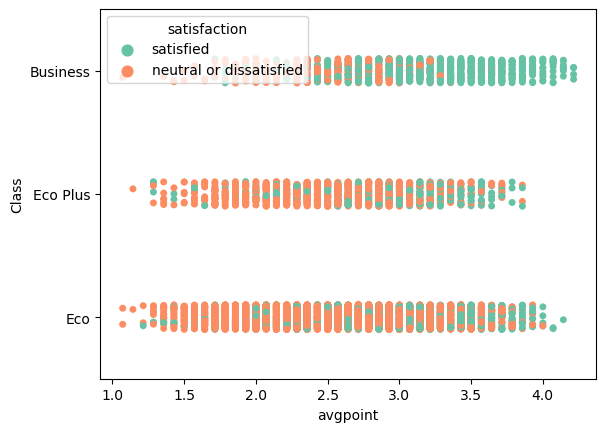

In [313]:
sns.stripplot(y='Class', x='avgpoint',data=df2,jitter=True,hue='satisfaction', palette='Set2') 

Пассажиры бизнес класса чаще ставили более высокие оценки, если были довольны перелетом. Пассажиры бизнес класса чаще оставалсись довольными

In [315]:
px.box(df2, x='Class', y='avgpoint', color='Class')

График позволяет увидеть медиану, область, где сосредоточена половина выборки, а также максимальное и минимальное значения. Пассажиры бизнес класса в среднем ставят выше оценки. Средние оенки пассажиров эконом и эконом плюс классов примерно равны. Разброс оценок меньше всего упассажиров эконом плюс класса.

### 2) В зависимости от цели поездки

<AxesSubplot:xlabel='avgpoint', ylabel='Type of Travel'>

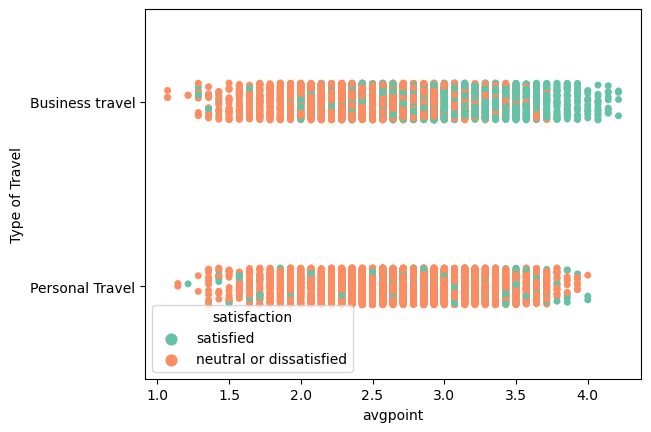

In [310]:
sns.stripplot(y='Type of Travel', x='avgpoint',data=df2,jitter=True,hue='satisfaction', palette='Set2')

В личных поездках пассажиры чаще оставались недовольными

In [317]:
px.box(df2, x='Type of Travel', y='avgpoint', color='Type of Travel')

### 3) В зависиомости от лояльности пассажира

<AxesSubplot:xlabel='avgpoint', ylabel='Customer Type'>

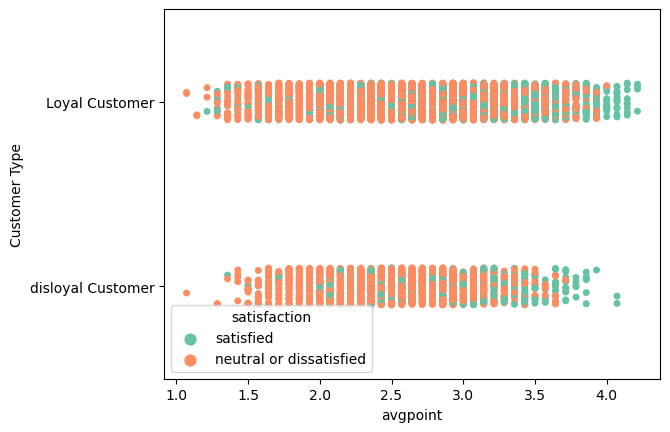

In [312]:
sns.stripplot(y='Customer Type',x='avgpoint',data=df2, hue='satisfaction', palette='Set2', jitter=True)

In [318]:
px.box(df2, x='Customer Type', y='avgpoint', color='Customer Type')

Лояльные пассажиры в среднем выше оценивали поездку

### Посмотрим на дальность перелетов. 
Для визуализации используем ящик с усами. Внутри "коробки" расположено 50% выборки

# Разбивка ср балл по каждому критерию в разрезе удовлетворенных и неудовлетворенных пассажиров

In [257]:
columns_to_mean=['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
ddd=df2.groupby(['satisfaction'])[columns_to_mean].mean()
ddd

Inflight wifi service  \
satisfaction                                     
neutral or dissatisfied               2.382905   
satisfied                             3.611587   

                         Departure/Arrival time convenient  \
satisfaction                                                 
neutral or dissatisfied                           3.191064   
satisfied                                         3.016787   

                         Ease of Online booking  Gate location  \
satisfaction                                                     
neutral or dissatisfied                2.484606       2.978882   
satisfied                              3.106649       2.946675   

                         Food and drink  Online boarding  Seat comfort  \
satisfaction                                                             
neutral or dissatisfied        2.976437         2.618651      3.055574   
satisfied                      3.550691         3.785385      3.695194   

                         Inflight entertainment  On-board service  \
satisfaction                                                        
neutral or dissatisfied                2.933533          3.038124   
satisfied                              3.779789          3.503292   

                         Leg room service  Baggage handling  Checkin service  \
satisfaction                                                                   
neutral or dissatisfied          3.028120          3.413693         3.077137   
satisfied                        3.458855          3.655695         3.359776   

                         Inflight service  Cleanliness  
satisfaction                                            
neutral or dissatisfied          3.444593     2.976437  
satisfied                        3.698815     3.599078

### Визуализация. Представим в виде лепесткой диаграммы

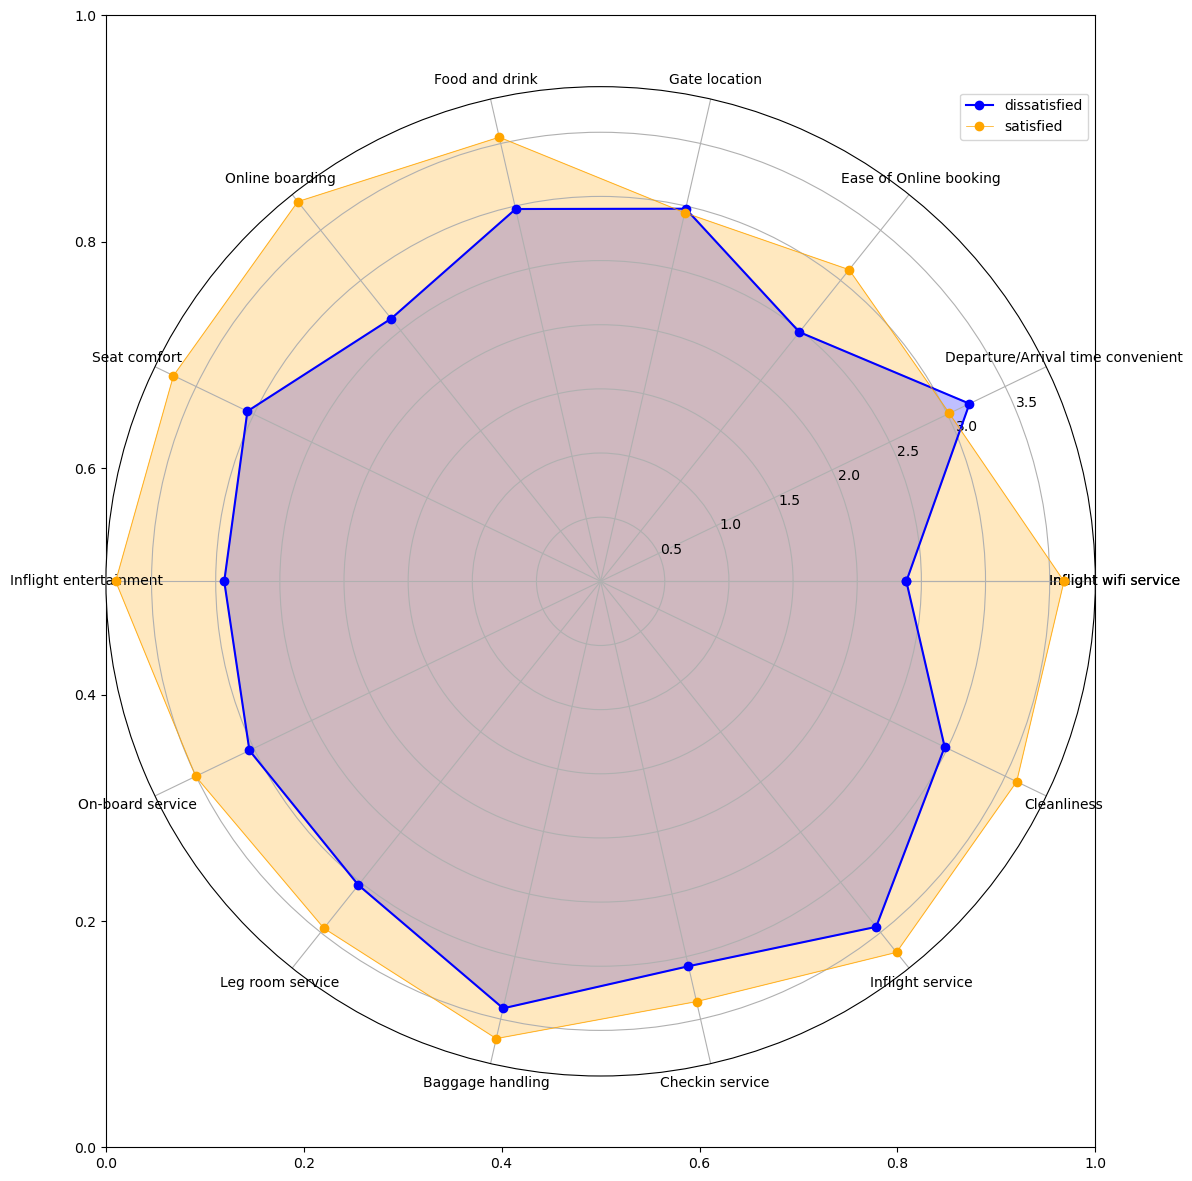

In [319]:
# Определяем столбцы для лепестковой диаграммы 
categories = list(ddd.columns[0:])
categories.append(categories[0])
# Получаем значения для двух групп
group1_values = ddd.iloc[0, :].tolist()
group2_values = ddd.iloc[1, :].tolist()

group1_values.append(group1_values[0])
group2_values.append(group2_values[0])

#Диаграмма
fig, ax = plt.subplots(figsize=(12, 12))
ax=fig.add_subplot(111, polar=True)

angles=np.linspace(0,2*np.pi,14, endpoint=False) 
angles=np.concatenate((angles,[angles[0]]))
#satisfied 
ax.plot(angles,group1_values, 'o-', color='blue', label='dissatisfied')
ax.fill(angles,group1_values, alpha=0.25, color='blue')
#dissatisfied Plot
ax.plot(angles, group2_values, 'o-', color='orange', linewidth=0.5, label='satisfied')
ax.fill(angles, group2_values, alpha=0.25, color='orange')

ax.set_thetagrids(angles * 180/np.pi, categories)

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Наибольшее отличия в средних оценках среди удовлетворенных и неудовлетверенных пассажиров пришлисть на критерии Online boarding и Inflight WiFi service.
Средние оценки для Gate location не отличались для удовлетверенных и неудовлетворенных пассажиров. (Можно предположить, что это незначительный критерий)

Посчитаем среднюю оценку по всем пареметрам всех пассажиров, кто остался довольным и недовольным по отдельности 

In [127]:
d_means.loc['satisfied'].mean() #ср балл довольных

3.483447756982977

In [128]:
d_means.loc['neutral or dissatisfied'].mean() #ср балл  недовольных

2.971411105289065

Найдем параметр, который выше всего оценели довольные пассажиры и параметр, который хуже всего оценили недовольные пассажиры 

In [129]:
d_means.loc['satisfied'].idxmax(), ddd.loc['satisfied'].max() #максимальная оцененка дана параметру online boarding

('Online boarding', 3.7853851217906516)

In [107]:
d_means.loc['neutral or dissatisfied'].idxmin(), ddd.loc['neutral or dissatisfied'].min() # ,больше всего недовольные пассажиры были не довольны inflight wifi service 

('Inflight wifi service', 2.3834854217671935)

# Разбивка ср балл по каждому критерию в зависимости от класса перелета

In [130]:
d4=df.groupby(['Class'])[columns_to_mean].mean()
d4.head()

Inflight wifi service  Departure/Arrival time convenient  \
Class                                                                
Business               2.778311                           2.915886   
Eco                    2.669405                           3.166119   
Eco Plus               2.709442                           3.180490   

          Ease of Online booking  Gate location  Food and drink  \
Class                                                             
Business                2.922369       2.993758        3.356943   
Eco                     2.593566       2.959962        3.087686   
Eco Plus                2.661972       2.971831        3.062598   

          Online boarding  Seat comfort  Inflight entertainment  \
Class                                                             
Business         3.728932       3.77503                3.654902   
Eco              2.821515       3.15384                3.089761   
Eco Plus         2.871153       3.10746                3.037559   

          On-board service  Leg room service  Baggage handling  \
Class                                                            
Business          3.694678          3.652181          3.852581   
Eco               3.117088          3.075925          3.450882   
Eco Plus          2.991654          3.035994          3.303599   

          Checkin service  Inflight service  Cleanliness  
Class                                                     
Business         3.528291          3.852981     3.499480  
Eco              3.134210          3.476911     3.091577  
Eco Plus         3.004173          3.360981     3.070423

### Визуализация 

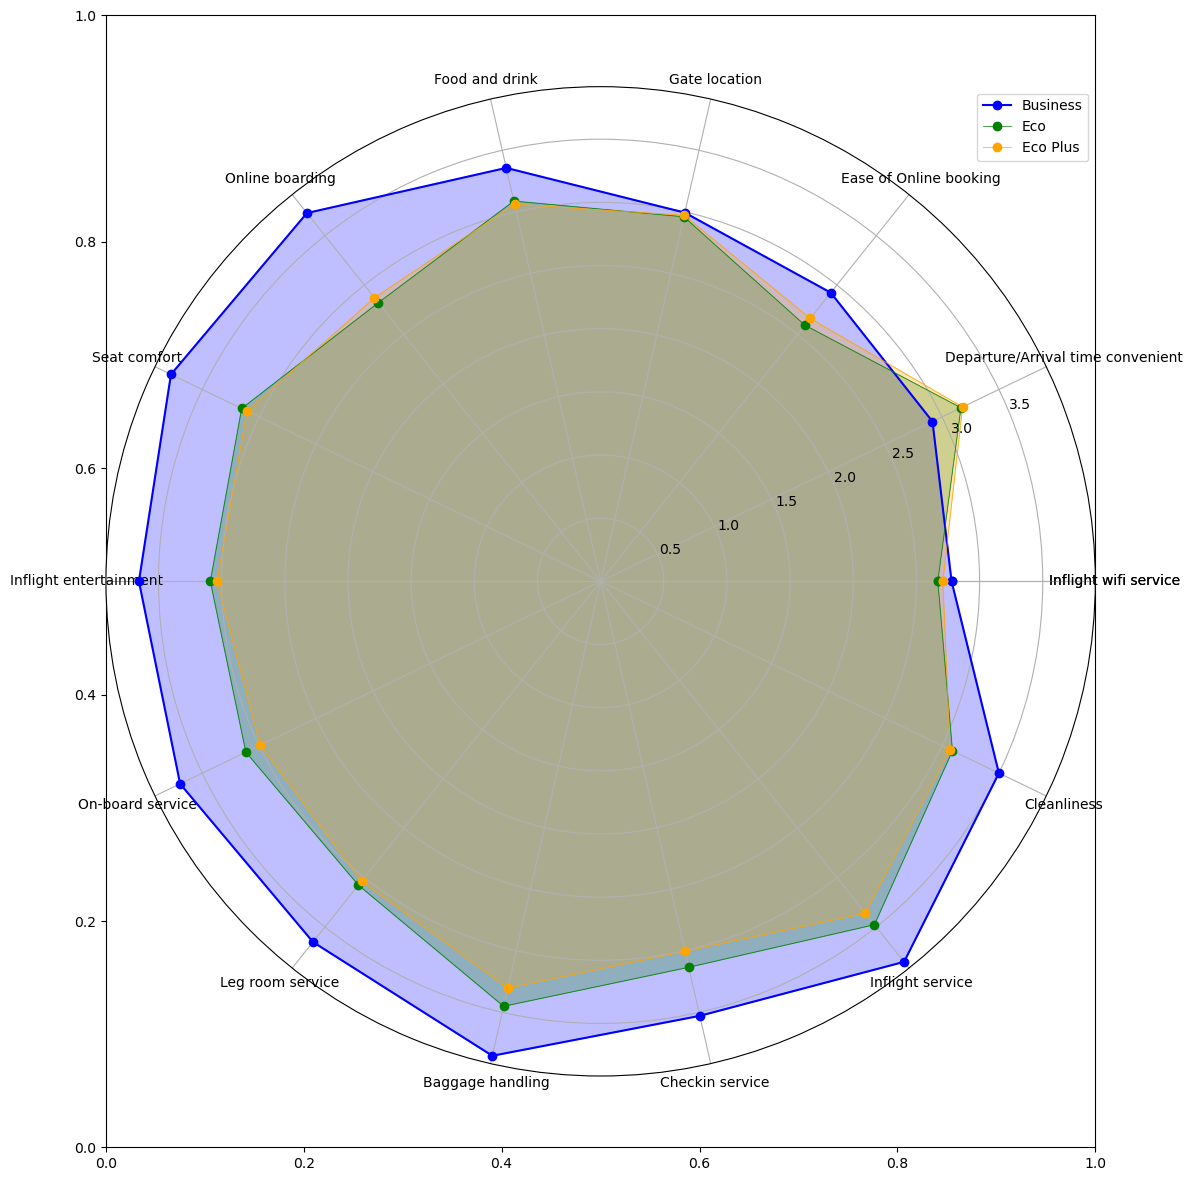

In [287]:
# Определяем столбцы для лепестковой диаграммы 
categories2 = list(d4.columns[0:])
categories2.append(categories2[0])
# Получаем значения для двух групп
group3_values = d4.iloc[0, :].tolist()
group4_values = d4.iloc[1, :].tolist()
group5_values = d4.iloc[2, :].tolist()

group3_values.append(group3_values[0])
group4_values.append(group4_values[0])
group5_values.append(group5_values[0])

#Диаграмма
fig, ax = plt.subplots(figsize=(12, 12))
ax=fig.add_subplot(111, polar=True)

angles=np.linspace(0,2*np.pi,14, endpoint=False) 
angles=np.concatenate((angles,[angles[0]]))
#Business plot 
ax.plot(angles,group3_values, 'o-', color='blue', label='Business')
ax.fill(angles,group3_values, alpha=0.25, color='blue')
#Eco plot
ax.plot(angles, group4_values, 'o-', color='green', linewidth=0.5, label='Eco')
ax.fill(angles, group4_values, alpha=0.25, color="green")
#Eco Plus plot
ax.plot(angles, group5_values, 'o-', color='orange', linewidth=0.5, label='Eco Plus')
ax.fill(angles, group5_values, alpha=0.25, color='orange')


ax.set_thetagrids(angles * 180/np.pi, categories)

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

У пассажиров бизнес класса в среднем все оценки были выше. Наибольшее различие в средних баллвх наблюдается по критерию online boarding, пассажиры бизнес класса оценили в среднем выше, чем пассажиры эконом и эконом плюс класса.
Departure/arrival time convenient - единсивенный критерий, который пассажиры бизнес класса оценили в среднем хуже, чем пассажиры других классов - пассажиры бизнес класса ожидают большего удобства по времени.
Средние оценки критерия gate location не отличаются для пассажиров разных классов.

In [131]:
d4.loc['Business'].idxmin(), d4.loc['Business'].min() ##смотрим какой критерий получил минимальную оценку у бизнес класса


('Inflight wifi service', 2.778311324529812)

Inflight wifi service оценен хуже всего. Потенциальное место для улучшения качества полета

In [134]:
d4.loc['Business'].idxmax(), d4.loc['Business'].max()  #смотрим какой критерий получил максимальную оценку у бизнес класса


('Inflight service', 3.852981192476991)

Максимальная средняя оценка для бизнес класса пришлась на inflight service, что хорошо, поскольку пассажиры данного класса платят дополнительно за сервис.

In [135]:
d4.loc['Eco'].idxmin(), d4.loc['Eco'].idxmax() #смотрим какой критерий получил min/max оценку для пассажиров эконом класса

('Ease of Online booking', 'Inflight service')

Пассажиры эконом класса также выше всего оценивают Inflight service - хороший знак для компаний перевозчиков.